# Inaugural Project

**Group members:** Hjalte Bisgaard, Julie Roesgaard og Sissel Andersen

**Date of hand-in:** 26. March 2023 

This project is the first of three in the course **Introduction to Programming and Numerical Analysis**. 

The project treats a household optimization problem and solves in multiple ways. 

Each question will have a short introduction and conclusion.

Imports and set magics:

In [2]:
# -*- coding: utf-8 -*-
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#importing modules
import numpy as np
from   mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize

# importing our class for the optimization problem
from householdoptimization import HouseholdOptimizationClass

# Question 1

In question 1 we solve the model using different values of the parameters alpha and sigma. In particular we use the following values as inputs:

$$\alpha = \{0.25, 0.50, 0.75\}$$
$$\sigma = \{0.50, 0.10, 1.50\}$$

For these vectors of inputs we return and illustrate the solution using a vector of ratio-solutions:

$$\frac{H_F}{H_M}$$

**STRUCTURE:**

**BLOCK 1.1:** We use a for loop over alpha and sigma to solve for the ratio of hours spent working within the home. 

**BLOCK 1.2:** We merge the ratio of $\frac{H_F}{H_M}$ together with the corresponding values of alpha and sigma using the zip-function, after which we plots the results.

In [3]:
### EXTRA: BLOCK 1.1 ###
func = HouseholdOptimizationClass()
func.solve_discrete()

solution_alpha = []
solution_sigma = []

HM_alpha_vec = ()
HF_alpha_vec = ()
HM_sigma_vec = ()
HF_sigma_vec = ()
alphas = (0.25,0.50,0.75)
sigmas = (0.5,1.0,1.5)

for alpha in alphas:
    func = HouseholdOptimizationClass()
    func.par.alpha = alpha
    solution_alpha.append(func.solve_discrete())

del alpha

for sigma in sigmas:
    func = HouseholdOptimizationClass()
    func.par.sigma = sigma
    solution_sigma.append(func.solve_discrete())

#extracting the solution
HF_alpha_vec = [ns.HF for ns in solution_alpha]
HM_alpha_vec = [ns.HM for ns in solution_alpha]


#printing
print(HF_alpha_vec, HM_alpha_vec)

HF_sigma_vec = [ns.HF for ns in solution_sigma]
HM_sigma_vec = [ns.HM for ns in solution_sigma]
    

/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:90: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho + 1e-8)
/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:85: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma + 1e-8)) + par.alpha*HF**((par.sigma-1)/(par.sigma + 1e-8)))**((par.sigma)/(par.sigma-1 + 1e-8))


[2.0, 4.5, 6.5] [6.5, 4.5, 2.0]


In [4]:
### BLOCK 1.1 ### 

# Calling the class
func = HouseholdOptimizationClass()

# Defining the alpha and sigma values to loop over 
alphas = [0.25, 0.5, 0.75]
sigmas = [0.5, 1, 1.5]

# Creating a dataframe for the alpha and sigma solutions
df_alphas_sigmas = pd.DataFrame(index=alphas, columns=sigmas)
ratio_discrete = []

# Creating a nested for loop
for alpha in alphas:
    for sigma in sigmas:
        func.par.alpha = alpha
        func.par.sigma = sigma
        solution_discrete = func.solve_discrete()
        ratio_discrete = solution_discrete.HF/solution_discrete.HM
        #print(ratio_discrete)

        # add our solutions to the dataframe
        df_alphas_sigmas.loc[alpha, sigma] = ratio_discrete

print(df_alphas_sigmas)

/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:85: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma + 1e-8)) + par.alpha*HF**((par.sigma-1)/(par.sigma + 1e-8)))**((par.sigma)/(par.sigma-1 + 1e-8))
/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:90: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho + 1e-8)


           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50       1.0       1.0       1.0
0.75  1.833333      3.25  4.666667


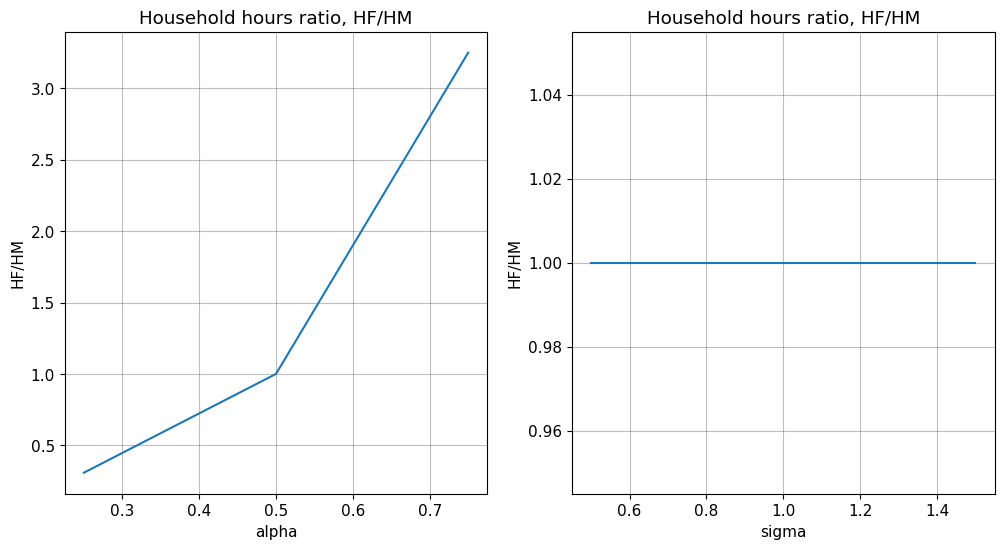

In [5]:
### EXTRA: BLOCK 1.2 ###

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 11})

ratio_alpha = [a/b for a, b in zip(HF_alpha_vec, HM_alpha_vec)]
ratio_sigma = [a/b for a, b in zip(HF_sigma_vec, HM_sigma_vec)]

def plot_alpha_sigma():
    # a. create the figure
    fig = plt.figure(figsize=(12,6))


    # b. plot for alpha
    ax = fig.add_subplot(1,2,1)

    ax.plot(alphas,ratio_alpha)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'alpha')
    ax.set_ylabel(f'HF/HM')

    # c. plot for sigma
    ax = fig.add_subplot(1,2,2,)

    ax.plot(sigmas,ratio_sigma)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'sigma')
    ax.set_ylabel(f'HF/HM')


plot_alpha_sigma()  
#print(HM_vec,HF_vec)


Text(0.5, 0, 'HF/HM')

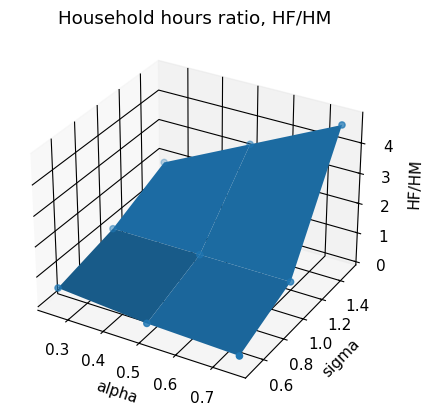

In [6]:
### BLOCK 1.2 ### 

from mpl_toolkits.mplot3d import Axes3D

# Creating a meshgrid for the alpha and sigma values
alpha_values, sigma_values = np.meshgrid(alphas, sigmas)


# Set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_values, sigma_values, df_alphas_sigmas.values)
ax.scatter(alpha_values, sigma_values, df_alphas_sigmas.values)


# Adding labels
ax.set_title(f'Household hours ratio, HF/HM')
ax.set_xlabel(f'alpha')
ax.set_ylabel(f'sigma')
ax.set_zlabel(f'HF/HM')

# Question 2

For question 2 we use given alpha and sigma parameters and solve the model discretely using a vector of inputs for wF. We again plot the results for the ratio $\frac{H_F}{H_M}$. This time the results are transformed using the logarithmic function. We use the following inputs for the female wage level:

$$w_F = \{0.8, 0.9, 1.0, 1.1, 1.2\}$$

**STRUCTURE:**

**BLOCK 2.1:** Solves the model for given wage levels

**BLOCK 2.2:** Plots the result of the model for different wage levels

In [7]:
### BLOCK 2.1 ###

#code for solving the model
solution_wage = []

HM_wage_vec = ()
HF_wage_vec = ()
wF = (0.8, 0.9, 1.0, 1.1, 1.2)


# b. for loop
for wages in wF:
    func = HouseholdOptimizationClass()
    func.par.wF = wages
    solution_wage.append(func.solve_discrete())
    
#c. extracting results
HF_wage_vec = [ns.HF for ns in solution_wage]
HM_wage_vec = [ns.HM for ns in solution_wage]

ratio_H_dis = [np.log(a/b) for a, b in zip(HF_wage_vec, HM_wage_vec)]
ratio_w_dis = np.log(wF)

#ratio_wage = np.log[HF_wage_vec/HM_wage_vec]
print(ratio_H_dis)
print(ratio_w_dis)

/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:90: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho + 1e-8)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


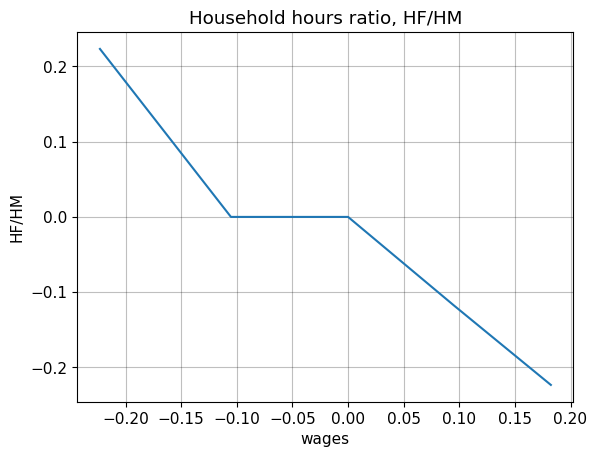

In [8]:
### BLOCK 2.2 ###

#code for plotting the results
def plot_wages():
    # a. create the figure
    fig = plt.figure()

    # b. plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ratio_w_dis,ratio_H_dis)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'wages')
    ax.set_ylabel(f'HF/HM')

plot_wages()

# Question 3

For question 3 we solve the model continuously using an optimize.minimize function. 

**STRUCTURE:** 

**BLOCK 3.1:** Solves the model for given wage levels

**BLOCK 3.2:** Plots the result of HF/HM as well as wF/wM against the different values of wF.

In [9]:
### BLOCK 3.1 ###
ratio_H, ratio_w = func.get_ratios()

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


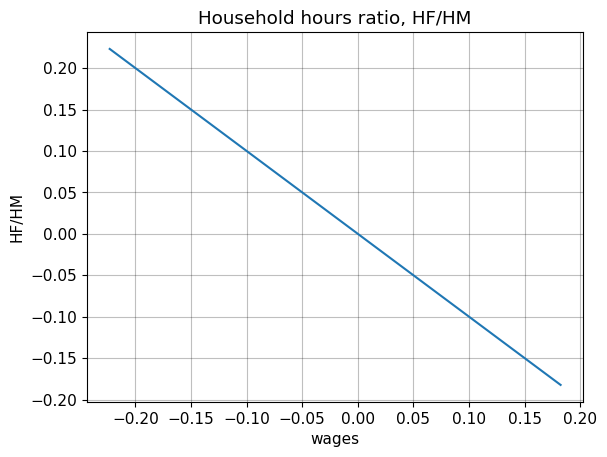

In [10]:
### BLOCK 3.2 ###

#plotting the results
def plot_wages_cont():
    # a. create the figure
    fig = plt.figure()

    # b. plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ratio_w,ratio_H)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'wages')
    ax.set_ylabel(f'HF/HM')

plot_wages_cont()

# Question 4

Using the estimates from the article we succesively optimize over our continuous function to try to replicate the research results. We optimize with respect to the parameters $\alpha$ and $\sigma$.

**STRUCTURE:**

**BLOCK 4.1:** Solving the model by minimizing the squared distance to empirial parameters found in research article by Siminski and Yetsenga (2022).

**BLOCK 4.2:** Illustrating the results from the regression using optmized parameters, alpha and sigma. 

In [30]:
### BLOCK 4.1 ###

def objective_fnc(parameters):
    # Unpack parameters
    alpha, sigma = parameters
    
    # Initialize class instance
    func = HouseholdOptimizationClass()

    # Set parametes of func
    func.par.alpha = alpha
    func.par.sigma = sigma

    # Get regression equation parts
    ratio_H, ratio_w = func.get_ratios()

    # Perform regression
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
    # print(slope, intercept)

    # Calculate loss
    beta0_target = 0.4
    beta0 = intercept
    beta1_target = -0.1
    beta1 = slope
    loss = (beta0_target - beta0)**2 + (beta1_target - beta1)**2 
    #print(beta0, beta1, loss)
    return loss


""""""
# Perform optimization
# x1 = (1, 0.01)  # Initial guess

# # Bounds for parameters alpha, sigma
# bounds_alpha_sigma = [(1e-8,1-1e-8),(1e-8,0.2-1e-8)] # bounds between 0 and 1 for alpha and 0 and 2 for sigma
# optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})
# best_alpha, best_sigma = optimize_result.x
# loss, beta0, beta1 = optimize_result.fun
# print(f"best_alpha = {best_alpha}, best_sigma = {best_sigma}, loss = {loss}, beta0 = {beta0}, beta1 = {beta1}")

x1 = (1, 0.01)  # Initial guess

# Bounds for parameters alpha, sigma
bounds_alpha_sigma = [(1e-8,1-1e-8),(1e-8,0.2-1e-8)] # bounds between 0 and 1 for alpha and 0 and 2 for sigma

# Calling the solver
optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})

# Extracting the optimized alpha and sigma and the loss
best_alpha, best_sigma = optimize_result.x
loss = optimize_result.fun

# Get regression results outside of objective function for beta0 and beta1
func = HouseholdOptimizationClass()
func.par.alpha = best_alpha
func.par.sigma = best_sigma
ratio_H, ratio_w = func.get_ratios()
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

# Printing the final parameters and results
print(f"best_alpha = {best_alpha}, best_sigma = {best_sigma}")
print(f"beta0 = {intercept:.4f}, beta1 = {slope:.4f}, loss = {loss}")

/var/folders/g2/f_5styjs0d53m4k1mknr83v80000gn/T/ipykernel_59040/2053961285.py:48: OptimizeWarning: Unknown solver options: return_values
  optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})
/var/folders/g2/f_5styjs0d53m4k1mknr83v80000gn/T/ipykernel_59040/2053961285.py:48: OptimizeWarning: Initial guess is not within the specified bounds
  optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})


best_alpha = 0.9999999899999977, best_sigma = 0.023000000000000013
beta0 = 0.4171, beta1 = -0.1212, loss = 0.0007402031467479734


Such that performing the optimization on our data for wages and hours while minimizing the squared distance to the empirical parameters found by Siminski and Yetsenga (2022) yields the following results:

$$\{\alpha_{best},\sigma_{best}\} \approx \{0.999, 0.023\}$$

$$\{\beta_0,\beta_1, \mathbb{L}\} \approx \{0.417, 0.121, 0.001\}$$

Where $\mathbb{L}$ is the loss defined as the squared distance of our estimated parameters for our data to the parameters found in the article.


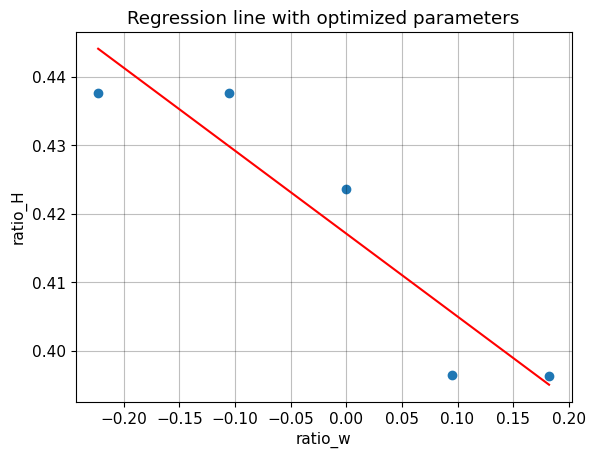

In [31]:
### BLOCK 4.2 ###

# Illustrating the datapoints and regression line using the optimized alpha and sigma-values.

# Initialize class instance with optimal parameters
func = HouseholdOptimizationClass()
func.par.alpha = best_alpha
func.par.sigma = best_sigma

# Get regression equation parts
ratio_H, ratio_w = func.get_ratios()

# Calculate regression line
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
regression_line = slope * ratio_w + intercept

# Plot the data and regression line
fig, ax = plt.subplots()
ax.scatter(ratio_w, ratio_H)
ax.plot(ratio_w, regression_line, color='red')
ax.set_xlabel('ratio_w')
ax.set_ylabel('ratio_H')
ax.set_title('Regression line with optimized parameters')
plt.show()


# Question 5

Implementing an extension to the model: 
We will try to implement an extension to the model, that can produce the estimate results from the article for $\alpha = 0.5$.

We do this by scaling the disutility of hours worked in the market for the male agent as a way of modelling that he might be less reluctant to work after hours. We define the updated household preferences:

$$\max_{L_M, H_M, L_F, H_F} \frac{Q^{1-\rho}}{1-\rho}-\nu \left(\frac{(\mu L_M + H_M)^{1-\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{(L_F + H_F)^{1-\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} \right)$$

In [32]:
### 5.1 ###
def objective_fnc(parameters):
    # Unpack parameters
    mu, sigma = parameters
    
    # Initialize class instance
    func = HouseholdOptimizationClass()
    func.par.extention = True

    # Set parametes of func
    func.par.mu = mu
    func.par.sigma = sigma

    # Get regression equation parts
    ratio_H, ratio_w = func.get_ratios()

    # Perform regression
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
    # print(slope, intercept)

    # Calculate loss
    beta0_target = 0.4
    beta0 = intercept
    beta1_target = -0.1
    beta1 = slope
    loss = (beta0_target - beta0)**2 + (beta1_target - beta1)**2 
    #print(beta0, beta1, loss)
    return loss


""""""
# Perform optimization
x1 = (1, 0.013)  # Initial guess

# Bounds for parameters alpha, sigma
bounds_alpha_sigma = [(1e-8,1-1e-8),(0.5-1e-8,1-1e-8)] # bounds between 0 and 1 for alpha and 0 and 2 for sigma
optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds = bounds_alpha_sigma)
best_alpha, best_sigma = optimize_result.x
print(f"best_alpha = {best_alpha}, best_sigma = {best_sigma}")

/var/folders/g2/f_5styjs0d53m4k1mknr83v80000gn/T/ipykernel_59040/603851889.py:37: OptimizeWarning: Initial guess is not within the specified bounds
  optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds = bounds_alpha_sigma)


best_alpha = 0.99999999, best_sigma = 0.49999999


ADD ECONOMIC INTERPRETATION